# tSNE on Train Set

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from Create_Mappings_and_Matrices import *

## Create Mappings and Matrices

In [2]:
# Create mappings and matrices
y_train, _, class_mapping, feature_matrices_train, _, feature_matrices_rescaled_train, _, feature_matrix_labels = create_mappings_and_matrices()

# Reassign variables
y = y_train
feature_matrices = feature_matrices_train
feature_matrices_rescaled = feature_matrices_rescaled_train

all features train
           Class                             harmonized_filename  \
0          Sedan         Sedan_train_orig_test_00191_resized.jpg   
1    Convertible  Convertible_train_orig_train_07913_resized.jpg   
2         Pickup          SUV_train_orig_train_00163_resized.jpg   
3          Sedan        Sedan_train_orig_train_06113_resized.jpg   
4          Sedan         Sedan_train_orig_test_05711_resized.jpg   
..           ...                                             ...   
371        Sedan        Sedan_train_orig_train_05545_resized.jpg   
372       Pickup        Pickup_train_orig_test_01575_resized.jpg   
373          SUV          SUV_train_orig_train_06550_resized.jpg   
374          SUV          SUV_train_orig_train_03292_resized.jpg   
375        Sedan        Sedan_train_orig_train_01250_resized.jpg   

                                       image_path_blur  \
0    ../../../Images/train/Blurred/Sedan_train_orig...   
1    ../../../Images/train/Blurred/Convertible_t

HOG_24_ppc features shape: (6003, 2304)
HSV features shape: (6003, 768)
LBP features shape: (6003, 25)
VGG features shape: (6003, 512)
ViT features shape: (6003, 1280)


items in all_features_df columns not in feature groups (hog, vgg, etc.): []


all features shape: (6003, 11945)
sum of smaller features matrix widths:  11945


## Function to Run tSNE

In [3]:
def get_tsne(X_list, n_components=2):
  '''
  Takes as input a list of feature matrices and returns a list of transformed feature matrices using t-SNE.
  '''
  xtsne_list = []
  for X in X_list:
    tsne = TSNE(n_components=n_components, random_state=0, n_jobs=-1)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list

## Transform Matrices

In [4]:
# dimensionality reduction
tsne_transformed_items  = get_tsne(X_list=feature_matrices_rescaled, n_components=2)
tsne_transformed_items_no_rescaling = get_tsne(X_list=feature_matrices, n_components=2)

# Check shapes
print('tsne transformed items length and first element shape')
print(len(tsne_transformed_items))
print(tsne_transformed_items[0].shape)
print('tsne transformed items no rescaling length and first element shape')
print(len(tsne_transformed_items_no_rescaling))
print(tsne_transformed_items_no_rescaling[0].shape)

tsne transformed items length and first element shape
7
(6003, 2)
tsne transformed items no rescaling length and first element shape
7
(6003, 2)


## Discriminability of Features

In [5]:
def plot_classes(X, y, ax, title):
  '''
  Plot the classes in a 2D space.
  '''

  # color code each cluster (class)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(list(class_mapping.keys())))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==list(class_mapping.values())[k], 0], X[y==list(class_mapping.values())[k], 1], alpha=0.5, facecolors=colorst[k], label = list(class_mapping.keys())[k])

  ax.set_title(title)
  ax.legend()

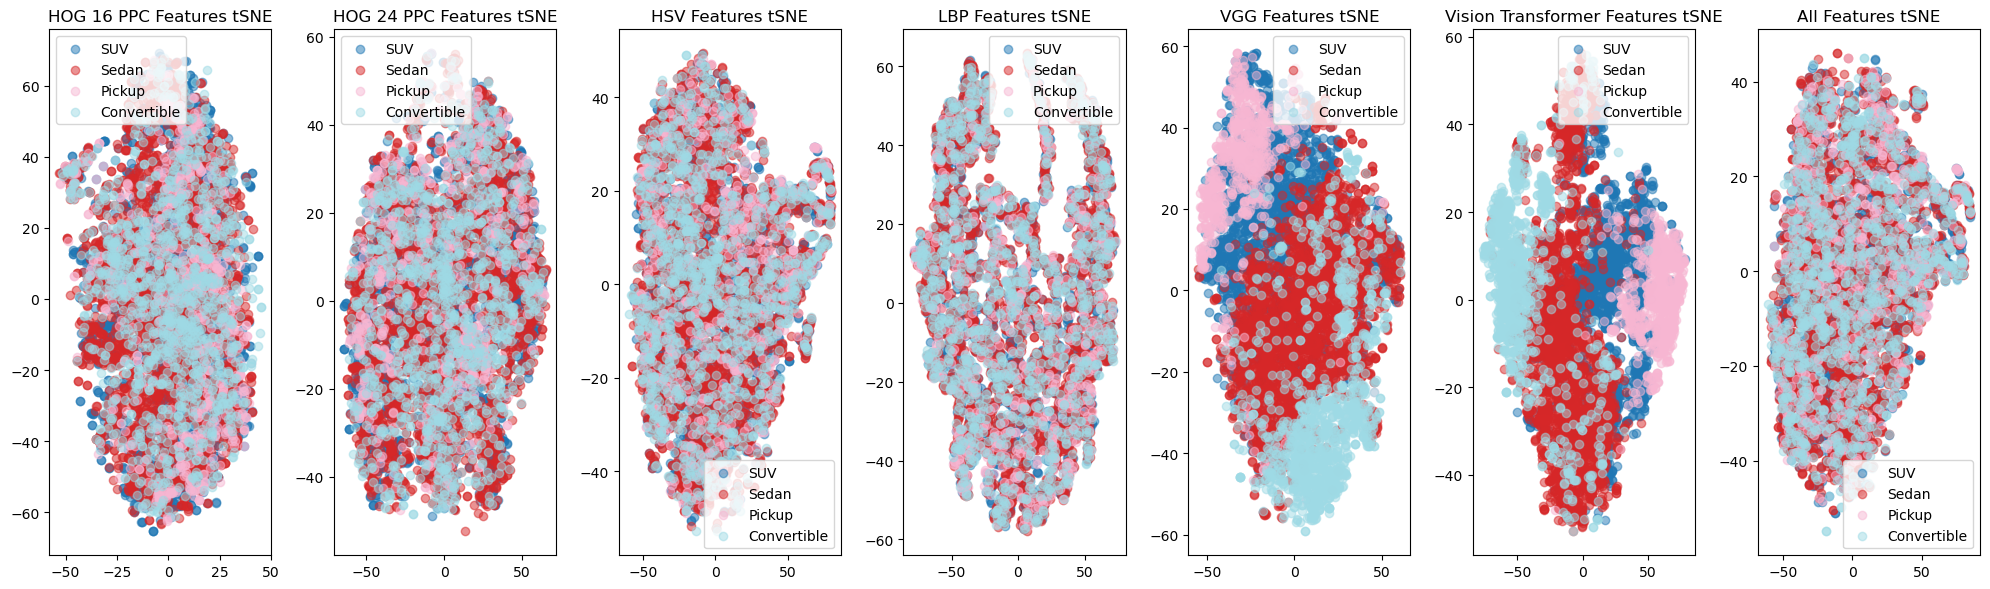

In [6]:
# plot results
#fig, ax = plt.subplots(nrows=2, ncols=len(feature_matrices), figsize=(20, 6))
fig, ax = plt.subplots(nrows=1, ncols=len(feature_matrices), figsize=(20, 3))

# Iterate over feature matrices transformed and plot
# Use non-rescaled version
for idx in range(len(feature_matrices)):
  # y is the class labels
  #plot_classes(tsne_transformed_items[idx], y, ax[0, idx], title=feature_matrix_labels[idx] + ' tSNE')
  #plot_classes(tsne_transformed_items_no_rescaling[idx], y, ax[1, idx], title=feature_matrix_labels[idx] + ' tSNE No Rescaling')
  plot_classes(tsne_transformed_items_no_rescaling[idx], y, ax[idx], title=feature_matrix_labels[idx] + ' tSNE')

plt.tight_layout()
plt.savefig('../../Output/PCA and tSNE/tSNE_Class_Discrinimability.png')
plt.show()